In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import warnings
warnings.filterwarnings("ignore")
import datetime
from datetime import datetime

%matplotlib inline
plt.style.use('fivethirtyeight')


In [2]:
from binance.client import Client
api_key = 'xVM7IUXNFne6yrZyGnHM605GdDUCQaoumMv8sEfKO6LeMdpo9XfzeoDgGOalhjoi'
secret = 'OhAFhj9WccUT1N3qrpJiXERXvI1PbsOVx6GgWAZmH7HgYr775l7N286CFQ4ZKh7B'
client = Client(api_key, secret)

In [3]:
candles = client.get_klines(symbol = 'BTCUSDT', interval = Client.KLINE_INTERVAL_30MINUTE) 


In [8]:
price = np.array([float(candles[i][4]) for i in range(500)])

time = np.array([int(candles[i][0]) for i in range(500)])

t = np.array([datetime.fromtimestamp(time[i]/1000).strftime('%H:%M:%S') for i in range(500)])

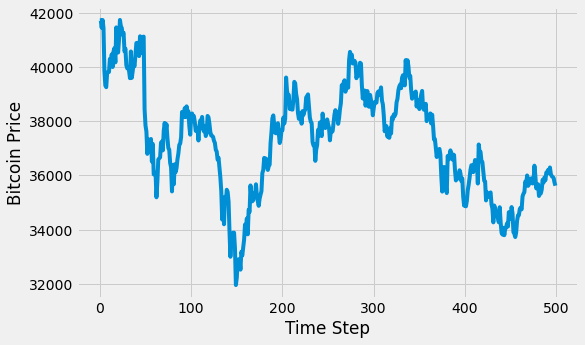

In [9]:
plt.figure(figsize = (8,5));
plt.xlabel('Time Step');
plt.ylabel('Bitcoin Price')
plt.plot(price);

In [10]:
timeframe = pd.DataFrame({'Time':t, 'Price $BTC': price})
timeframe

,Time,Price $BTC
0,09:30:00,41713.33
1,10:00:00,41714.99
2,10:30:00,41439.32
3,11:00:00,41724.15
4,11:30:00,41432.88
...,...,...
495,17:00:00,35974.96
496,17:30:00,35940.45
497,18:00:00,35911.34
498,18:30:00,35741.03


In [12]:
price = price.reshape(500,1)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(price[:374])

price = scaler.transform(price)

df = pd.DataFrame(price.reshape(100,5), columns = ['First', 'Second', 'Third', 'Fourth', 'Target'])
# Here First, Second, Third, Fourth are the seconds over which it is trained 
# and target is the value which will be predicted

df.head()

,First,Second,Third,Fourth,Target
0,2.013341,2.014226,1.867269,2.019109,1.863836
1,1.014905,0.733108,0.700110,0.985558,0.998662
2,0.999675,1.255761,1.161841,1.343545,1.096180
3,1.406369,1.467003,1.186821,1.873884,1.626466
4,1.380728,1.634026,2.019877,1.899174,1.862130


## Train Test Split

In [13]:
x_train = df.iloc[:74, :4]
y_train = df.iloc[:74, -1]

x_test = df.iloc[75:99,:4]
y_test = df.iloc[75:99,-1]

In [14]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [28]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree = 5)
X_poly = poly.fit_transform(x_train)
  
poly.fit(X_poly, y_train)
reg = LinearRegression()
reg.fit(X_poly, y_train) 

y_pred=reg.predict(poly.fit_transform(x_test))


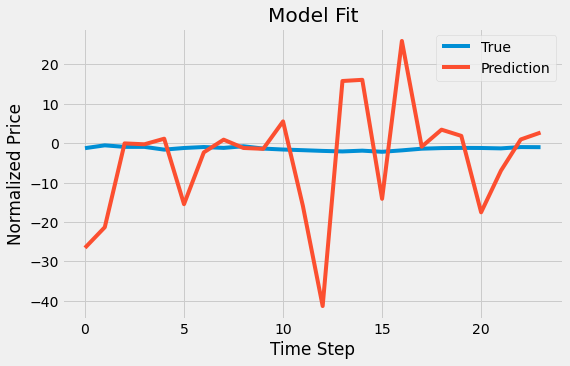

In [29]:
# we need to inverse tranform to check the original values, since we had scaled it previously

plt.figure(figsize = [8,5])
plt.title('Model Fit')
plt.xlabel('Time Step')
plt.ylabel('Normalized Price')
plt.plot(y_test, label='True')
plt.plot(y_pred, label='Prediction')
plt.legend()

In [30]:
import numpy as np
from sklearn.metrics import mean_squared_error
testScore = np.sqrt(mean_squared_error(y_test, y_pred))
print ('Test Score {} RMSE WITH GRU'.format(testScore))

Test Score 14.426663285342737 RMSE WITH GRU


In [31]:
X = df.iloc[:, 1:4].values
y = df.iloc[:, 4].values

In [34]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [35]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [50]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

LinearRegression()

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 1)